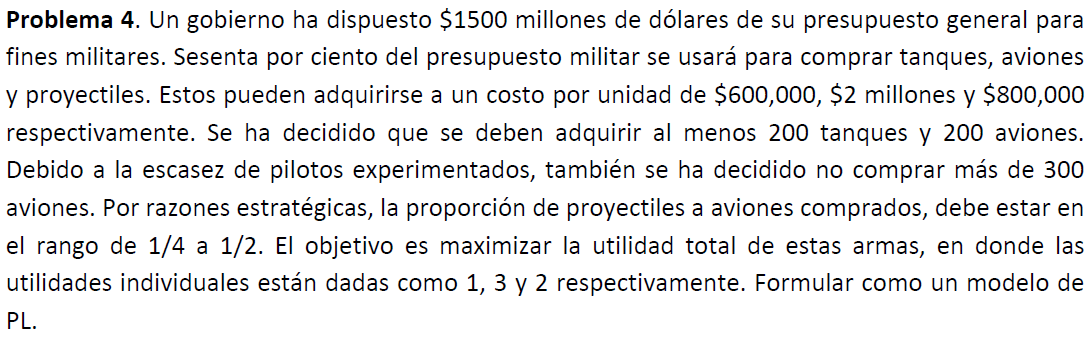

## Sets
I es el conjunto de tipo de armamento (i = 1 son tanques, i = 2 son aviones, i = 3 son proyectiles)

In [14]:
import pyomo.environ as pe
import pyomo.opt as po

In [15]:
model = pe.ConcreteModel()

In [16]:
model.I = pe.RangeSet(1,3)

## Parameters
LIi es el número de unidades del armamento i mínimas requeridas (unidad)\
LSi es el número de unidades del armamento i máximas permitidas (unidad)\
Ci es el costo unitario del tipo de armamento i (dolar/unidad)\
Ui es la utilidad unitaria del tipo de armamento i (dolar/unidad)\
P es el presupuesto para la compra del armamento (dolar)

In [17]:
LItan = 200
LIav = 200
LSav = 300
C = {1: 600000, 2: 2000000, 3: 800000}
U = {1: 1, 2: 3, 3: 2}
P = 900000

In [18]:
model.LItan = pe.Param(initialize = LItan) #Unidades mínimas requeridas de tanques
model.LIav = pe.Param(initialize = LIav) #Unidades mínimas requeridas de aviones
model.LSav = pe.Param(initialize = LSav) #Unidades máximas permitidas de aviones
model.C = pe.Param(model.I, initialize = C) #Costo unitario
model.U = pe.Param(model.I, initialize = U) #Utilidad unitaria
model.P = pe.Param(initialize = P) #Presupuesto

## Variables
xi es el número de unidades a adquirir del tipo de armamento i

In [19]:
model.x = pe.Var(model.I, domain = pe.NonNegativeReals)

## Objective

In [20]:
Z = sum(model.U[i] * model.x[i] for i in model.I)
model.objective = pe.Objective(sense = pe.maximize, expr = Z)
model.objective.pprint()

objective : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : maximize : x[1] + 3*x[2] + 2*x[3]


## Constraints

In [21]:
#Presupuesto
cost_lhs = sum(model.C[i] * model.x[i] for i in model.I)
cost_rhs = model.P
model.presupuesto = pe.Constraint(expr = (cost_lhs <= cost_rhs))
model.presupuesto.pprint()

presupuesto : Size=1, Index=None, Active=True
    Key  : Lower : Body                                     : Upper    : Active
    None :  -Inf : 600000*x[1] + 2000000*x[2] + 800000*x[3] : 900000.0 :   True


In [22]:
#Cantidades mínimas de tanques
LI_tan_lhs = model.x[1]
LI_tan_rhs = model.LItan
model.infTanques = pe.Constraint(expr = (LI_tan_lhs >= LI_tan_rhs))
model.infTanques.pprint()

infTanques : Size=1, Index=None, Active=True
    Key  : Lower : Body : Upper : Active
    None : 200.0 : x[1] :  +Inf :   True


In [23]:
#Cantidades mínimas de aviones
LI_av_lhs = model.x[2]
LI_av_rhs = model.LIav
model.infAviones = pe.Constraint(expr = (LI_av_lhs >= LI_av_rhs))
model.infAviones.pprint()

infAviones : Size=1, Index=None, Active=True
    Key  : Lower : Body : Upper : Active
    None : 200.0 : x[2] :  +Inf :   True


In [24]:
#Cantidades máximas de aviones
'''
model.sup = pe.ConstraintList()
for i in model.I:
    LS_lhs = model.x[i]
    LS_rhs = model.LS[i]
    model.sup.add(LS_lhs <= LS_rhs)
model.sup.pprint()
'''
LS_av_lhs = model.x[2]
LS_av_rhs = model.LSav
model.supAviones = pe.Constraint(expr = (LS_av_lhs <= LS_av_rhs))
model.supAviones.pprint()

supAviones : Size=1, Index=None, Active=True
    Key  : Lower : Body : Upper : Active
    None :  -Inf : x[2] : 300.0 :   True


In [25]:
'''
model.lim = pe.ConstraintList()
for i in model.I:
    LI_lhs = model.x[i]
    LI_rhs = model.LI[i]
    model.lim.add(LI_lhs >= LI_rhs)
model.lim.pprint()
'''

'\nmodel.lim = pe.ConstraintList()\nfor i in model.I:\n    LI_lhs = model.x[i]\n    LI_rhs = model.LI[i]\n    model.lim.add(LI_lhs >= LI_rhs)\nmodel.lim.pprint()\n'

In [26]:
con1_lhs = model.x[3]
con1_rhs = model.x[2]/4
model.conone = pe.Constraint(expr = (con1_lhs >= con1_rhs))
model.conone.pprint()

conone : Size=1, Index=None, Active=True
    Key  : Lower : Body             : Upper : Active
    None :  -Inf : 0.25*x[2] - x[3] :   0.0 :   True


In [27]:
con2_lhs = model.x[3]
con2_rhs = model.x[2]/2
model.contwo = pe.Constraint(expr = (con2_lhs <= con2_rhs))
model.contwo.pprint()

contwo : Size=1, Index=None, Active=True
    Key  : Lower : Body            : Upper : Active
    None :  -Inf : x[3] - 0.5*x[2] :   0.0 :   True


## Solver

In [28]:
solver = po.SolverFactory('glpk')
results = solver.solve(model, tee = True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\JRODRI~1.VIL\AppData\Local\Temp\tmpx8jo_h3g.glpk.raw --wglp
 C:\Users\JRODRI~1.VIL\AppData\Local\Temp\tmpd1b2jzia.glpk.glp --cpxlp C:\Users\JRODRI~1.VIL\AppData\Local\Temp\tmpkmvfyxbd.pyomo.lp
Reading problem data from 'C:\Users\JRODRI~1.VIL\AppData\Local\Temp\tmpkmvfyxbd.pyomo.lp'...
7 rows, 4 columns, 11 non-zeros
46 lines were read
Writing problem data to 'C:\Users\JRODRI~1.VIL\AppData\Local\Temp\tmpd1b2jzia.glpk.glp'...
35 lines were written
GLPK Simplex Optimizer 5.0
7 rows, 4 columns, 11 non-zeros
Preprocessing...
PROBLEM HAS NO PRIMAL FEASIBLE SOLUTION
If you need actual output for non-optimal solution, use --nopresol
Time used:   0.0 secs
Memory used: 0.0 Mb (32013 bytes)
Writing basic solution to 'C:\Users\JRODRI~1.VIL\AppData\Local\Temp\tmpx8jo_h3g.glpk.raw'...
20 lines were written


In [64]:
conda install -c ibmdecisionoptimization cplex

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed

Note: you may need to restart the kernel to use updated packages.



Examining python=3.9:  75%|#######5  | 3/4 [00:00<00:00, 91.04it/s]          
                                                                   

Examining conflict for cplex python:   0%|          | 0/4 [00:00<?, ?it/s]
                                                                          

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cplex -> python[version='2.7.*|3.5.*|>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.8,<3.9.0a0|>=3.5,<3.6.0a0']

Your python: python=3.9

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.



